<a href="https://colab.research.google.com/github/cbsobral/ml-fies/blob/main/Module00_LoadingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Module 00 - Create Train and Test Sets

In this first module, we perform the following steps:

1. Load the data from Google Drive in two parts (the file is too big to load at once);
2. Exclude irrelevant variables or variables with too many missing values;
3. Rename variables in English and possibly with shorter names;
4. Divide training and test set.

### 1 - Load Data



In [73]:
import pandas as pd

url_a = "https://drive.google.com/file/d/1prPbFSiXFTHmTHzXTGxy4HrtRxXUHhce/view?usp=sharing"
path_a = "https://drive.google.com/uc?export=download&id="+url_a.split("/")[-2]
base_df_a = pd.read_excel(path_a)
base_df_a.shape

(309999, 37)

In [74]:
url_b = "https://drive.google.com/file/d/1nGckSszPPifPvR3o5FeYaKArUYbfjHGn/view?usp=sharing"
path_b = "https://drive.google.com/uc?export=download&id="+url_b.split("/")[-2]
base_df_b = pd.read_excel(path_b)
base_df_b.shape

(327823, 37)

In [75]:
complete_set = base_df_a.append(base_df_b)
complete_set.shape

(637822, 37)

### 2 - Adjust Variables

New variables:

In [76]:
# student
complete_set = complete_set.assign(student = 1*(complete_set["DS_OCUPACAO"]=="Estudante"))

# default
complete_set = complete_set.assign(default = 1*(complete_set["nu_dias_atraso"]>=365))

# age
complete_set = complete_set[pd.to_numeric(complete_set["ANO_NASC"],errors='coerce').notna()]
complete_set = complete_set.assign(age = 2015 - (complete_set["ANO_NASC"]))

In [77]:
new_names ={"NU_ANO_SEMESTRE_INSCRICAO":"semester_enroll",
            "SG_SEXO":"gender",
            "DS_OCUPACAO":"occupation",
            "DS_RACA_COR" : "ethnicity",
            "NU_ANO_CONCLUSAO_ENSINO_MEDIO":"high_school_endyear",
            "SG_UF_CURSO": "state_course",
            "QT_SEMESTRES_CURSO": "n_sem_course",
            "VL_SEMESTRE_COM_DESCONTO": "tuition_discounted",
            "NU_PERCENT_SOLICITADO_FINANC":"perc_requested",
            "VL_FINANC_RECURSO_ALUNO":"student_resource",
            "ANO_NASC":"birth_year",
            "DS_ESTADO_CIVIL":"marital_status", 
            "VL_RENDA_PESSOAL_BRUTA_MENSAL": "personal_income",
            "VL_RENDA_FAMILIAR_BRUTA_MENSAL": "family_income",
            "ST_ENSINO_MEDIO_ESCOLA_PUBLICA": "public_hs",
            "NO_CURSO": "degree",
            "QT_SEMESTRE_CONCLUIDO": "n_completed_sem",
            "VL_SEMESTRE_ATUAL": "tuition_current",
            "VL_FINANCIADO_SEMESTRE": "loan_value_sem",
            "fase_contrato": "contract_phase",
            "vl_divida": "total_debt",            
            "VL_AVALIACAO_IGC": "igc",
            "VL_FAIXA_CPC": "cpc",
            "VL_FAIXA_CC": "cc",
            "QT_SEMESTRE_FINANCIAMENTO": "sem_funded",
            "QT_MEMBRO": "fam_size",
            "VL_RENDA_PER_CAPITA":"income_pc",
            "NU_PERCENTUAL_COMPROMETIMENTO":"inc_prop",
            "VL_TOTAL_FINANCIAMENTO":"loan_value",
            "VL_LIMITE_GLOBAL":"loan_limit",
            "dt_inicio_cont":"date_contract"
}

complete_set = complete_set.rename(index=str, columns=new_names)
print(complete_set.columns)

Index(['semester_enroll', 'gender', 'occupation', 'marital_status',
       'family_income', 'personal_income', 'NO_MUNICIPIO', 'SG_UF',
       'ethnicity', 'public_hs', 'high_school_endyear',
       'NU_SEMESTRE_REFERENCIA', 'state_course', 'degree', 'igc', 'cpc', 'cc',
       'n_sem_course', 'n_completed_sem', 'sem_funded',
       'QT_MESES_FINANC_SEMESTRE_ATUAL', 'fam_size', 'income_pc',
       'VL_SEMESTRE_SEM_DESCONTO', 'tuition_discounted', 'tuition_current',
       'inc_prop', 'perc_requested', 'loan_value_sem', 'student_resource',
       'loan_value', 'loan_limit', 'date_contract', 'contract_phase',
       'nu_dias_atraso', 'total_debt', 'birth_year', 'student', 'default',
       'age'],
      dtype='object')


### 3 - Clean Dataset

In [78]:
import numpy as np

# Calculate values for wrong entries (larger than 300,000 reais)
complete_set['loan_value_sem'] = np.where((complete_set.loan_value_sem > 300000), (complete_set["perc_requested"]/100 * complete_set["tuition_current"]), 
                                          complete_set.loan_value_sem)

In [79]:
# Drop variables
variables_to_drop = ["NO_MUNICIPIO",
                     "SG_UF",
                     "VL_SEMESTRE_SEM_DESCONTO",
                     "NU_SEMESTRE_REFERENCIA", 
                     "nu_dias_atraso", 
                     "QT_MESES_FINANC_SEMESTRE_ATUAL"]

complete_set_clean = complete_set.drop(variables_to_drop, axis = 1)                

In [80]:
import datetime as dt
                    
complete_set_clean["date_contract"]= complete_set_clean["date_contract"].map(dt.datetime.toordinal)

Eliminating outliers for *family income* (4 obs.):

In [81]:
complete_set_clean = complete_set_clean.loc[(complete_set_clean['family_income'] < 100000)] 

In [82]:
complete_set_clean.shape

(637715, 34)

Limiting the variable *age* to interval (10,100):

In [83]:
complete_set_clean["age"].unique()

array([24, 25, 19, 23, 22, 20, 26, 27, 32, 18, 21, 62, 46, 30, 31, 33, 34,
       48, 52, 35, 36, 50, 45, 60, 28, 44, 47, 37, 56, 39, 43, 29, 49, 59,
       51, 55, 57, 63, 38, 65, 58, 42, 61, 40, 54, 41, 53, 64, 68, 66, 70,
       72, 7, 17, 71, 75, 67, 69, 74, 16, 8, 76, 115, 10, 77, 78, 79, 73,
       87, 15, 13, 12, 11, 118], dtype=object)

In [84]:
complete_set_clean = complete_set_clean.loc[(complete_set_clean['age'] < 100) & (complete_set_clean['age'] > 10)] 

In [85]:
complete_set_clean["age"].value_counts()

21    63278
20    58433
22    54722
23    45584
24    38360
      ...  
79        1
15        1
13        1
12        1
11        1
Name: age, Length: 69, dtype: int64

In [86]:
#Here are the columns we want to drop NA's and not treat like using median, or something else
complete_set_clean = complete_set_clean.dropna(subset=["semester_enroll",
                                                       "gender",
                                                       "occupation",
                                                       "marital_status",
                                                       "ethnicity",
                                                       "public_hs",
                                                       "state_course",
                                                       "degree",
                                                       "igc","cpc","cc",
                                                       "contract_phase",
                                                       "high_school_endyear"])

In [87]:
#Birth year has to be corrected in the excel file
complete_set_clean = complete_set_clean.astype({"semester_enroll":str,
                                                "igc":'int64',"cpc":'int64',"cc":'int64'
                                               })

In [94]:
#Get only categorical
cat_names = list(complete_set_cat)
cat_names

['semester_enroll',
 'gender',
 'occupation',
 'marital_status',
 'ethnicity',
 'public_hs',
 'state_course',
 'degree',
 'contract_phase',
 'birth_year',
 'age']

 ### 4 - Correlation Matrix

 Define variables to be dropped

In [89]:
# Calculate correlations with target (default)
corr_matrix = complete_set_clean.corr()
corr_matrix['default'].sort_values(ascending=False, key=pd.Series.abs)

default                1.000000
family_income         -0.226217
n_sem_course          -0.223291
income_pc             -0.207358
sem_funded            -0.196516
total_debt            -0.179184
loan_value            -0.176332
tuition_discounted    -0.160652
tuition_current       -0.159575
loan_limit            -0.153371
perc_requested         0.142104
student_resource      -0.141676
loan_value_sem        -0.127679
fam_size              -0.097060
student               -0.083132
igc                   -0.074704
n_completed_sem        0.070191
date_contract         -0.068845
cc                    -0.062358
cpc                   -0.047460
inc_prop               0.035391
personal_income       -0.015710
high_school_endyear    0.005846
Name: default, dtype: float64

In [90]:
# variables that need to be inspected
corr_income = complete_set_clean[['family_income', 'income_pc', 'fam_size', 'default']].copy()
corr_tuition = complete_set_clean[['tuition_discounted', 'tuition_current', 'loan_limit', 'loan_value_sem', 'loan_value', 'perc_requested', 'default']].copy()
corr_eval = complete_set_clean[['igc', 'cc', 'cpc','default']].copy()

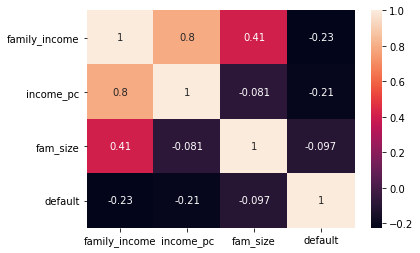

In [91]:
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = corr_income.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

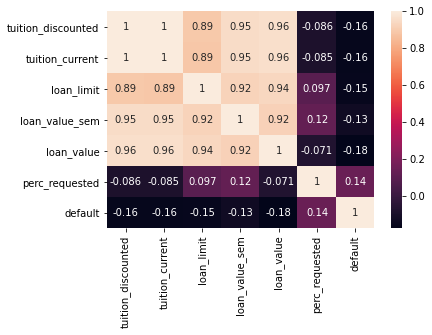

In [92]:
corrMatrix = corr_tuition.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
corrMatrix = corr_eval.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

Drop variable "tuition_discounted"

In [95]:
complete_set_clean = complete_set_clean.drop("tuition_discounted", axis=1)

### 5 - Creat Train and Test Sets

In this section we will create the training and test set using the function *train_test_split* from Scikit-Learn. Two important considerations about our choice:

* Our dataset is a sample provided by the Brazilian Governent and will not be updated. Therefore, we chose not to be concerned about future splits with updated data;

* Our data includes 637,822 instances. We assume it is big enough and do not employ stratified sampling.

In [96]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(complete_set_clean, test_size=0.2, random_state=42)

### 6 - Download Sets

In [97]:
from google.colab import files

# Training dataset
train.to_csv('train.csv')
files.download('train.csv')

# Test dataset
test.to_csv('test.csv')
files.download('test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>